### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [17]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [4]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = False

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [5]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

In [6]:
test_directory = Path("../test_data/fine_tip_clearance_revised/")

In [7]:
data_dict = {}
files = [
    "test_0.3mm_pb_0.csv",
    "test_0.4mm_pb_0.csv",
    "test_0.9mm_pb_0.csv",
    "test_1mm_pb_0.csv",
    # "test_0.4mm_pb_1.csv",
    "test_0.5mm_pb_0.csv",
    # "test_0.5mm_pb_1.csv",
    # "test_0.5mm_pb_2.csv",
    # "test_0.5mm_pb_3.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",
    # "test_0.4mm_pb_4.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",
    "test_0.2mm_pb_0.csv",
    "test_0.2mm_pb_1.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [25]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else None
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name           tip_clearance_mm time_ms                    
test_0.2mm_pb_0.csv 0.2              0.481                0.0   
                                     5.162                0.0   
                                     9.169                0.0   
                                     13.157               0.0   
                                     17.169               0.0   
...                                                       ...   
test_1mm_pb_0.csv   1.0              81965.157         1228.0   
                                     81969.157         1171.0   
                                     81973.157         1142.0   
                                     81977.161         1100.0   
                                     81981.151         1057.0   

                                                bottom_motor_rpm  \
test_name           tip_clearance_mm time_ms                       
test_0.2mm_pb_0.csv 0.2              0.481                   0.0   
                                     5.162                   0.0   
                                     9.169                   0.0   
                                     13.157                  0.0   
                                     17.169                  0.0   
...                                                          ...   
test_1mm_pb_0.csv   1.0              81965.157            1200.0   
                                     81969.157            1242.0   
                                     81973.157            1157.0   
                                     81977.161            1171.0   
                                     81981.151            1085.0   

                                                batt_voltage_V  \
test_name           tip_clearance_mm time_ms                     
test_0.2mm_pb_0.csv 0.2              0.481              15.183   
                                     5.162              14.364   
                                     9.169              14.112   
                                     13.157             14.049   
                                     17.169             13.986   
...                                                        ...   
test_1mm_pb_0.csv   1.0              81965.157          12.726   
                                     81969.157          12.705   
                                     81973.157          12.705   
                                     81977.161          12.705   
                                     81981.151          12.747   

                                                batt_current_A  top_current_A  \
test_name           tip_clearance_mm time_ms                                    
test_0.2mm_pb_0.csv 0.2              0.481               10.24        0.14540   
                                     5.162               10.24        0.18902   
                                     9.169               10.24        0.21810   
                                     13.157              10.24        0.05816   
                                     17.169              10.24        0.08724   
...                                                        ...            ...   
test_1mm_pb_0.csv   1.0              81965.157           10.24        0.24718   
                                     81969.157           10.24        0.18902   
                                     81973.157           10.24       -0.01454   
                                     81977.161           10.24        0.14540   
                                     81981.151           10.24        0.13086   

                                                bottom_current_A  thrust_N  \
test_name           tip_clearance_mm time_ms                                 
test_0.2mm_pb_0.csv 0.2              0.481              -0.15301  0.495982   
                                     5.162              -0.33384  0.495982   
                                     9.169              -0.19474  0.495982   
              

In [40]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                       mean         std   
test_name           tip_clearance_mm throttle                             
test_0.2mm_pb_0.csv 0.2              30         6760.232500   47.764822   
                                     40         8578.820000   88.057718   
                                     50         9817.598500  112.476832   
                                     60        11168.517500  294.337237   
                                     70        12210.410000  101.725896   
                                     80        13243.349500  134.103065   
                                     90        14312.397103   97.587002   
                                     100       15165.089500  475.496590   
test_0.2mm_pb_1.csv 0.2              30         6787.271000   45.092552   
                                     40         8623.606000   89.299457   
                                     50         9923.186000  120.998825   
                                     60        11389.346000   92.971039   
                                     70        12508.893000  104.777749   
                                     80        13646.085000  323.648086   
                                     90        14686.881000  471.708963   
                                     100       15431.964000  346.515385   
test_0.3mm_pb_0.csv 0.3              30         6768.615000   48.676920   
                                     40         8633.708253   89.058746   
                                     50         9771.128500  116.843186   
                                     60        11199.204635  303.260269   
                                     70        12306.132000  104.911443   
                                     80        13395.049500  106.171749   
                                     90        14437.183500  335.539810   
                                     100       15247.352000  489.379446   
test_0.4mm_pb_0.csv 0.4              30         6781.610000   46.187612   
                                     40         8645.536000   90.470637   
                                     50         9874.979500  111.821720   
                                     60        11344.392500  114.221512   
                                     70        12445.247000  108.485010   
                                     80        13612.917000  323.017229   
                                     90        14672.186000  472.316899   
                                     100       15715.701000  116.215983   
test_0.5mm_pb_0.csv 0.5              30         6787.675500   46.803317   
                                     40         8665.083500   91.352554   
                                     50         9885.557000  118.175731   
                                     60        11358.943500  107.693213   
                                     70        12504.110000   95.097953   
                                     80        13649.463500  324.722531   
                                     90        14718.619000  473.968697   
                                     100       15512.802500   90.139981   
test_0.9mm_pb_0.csv 0.9              30         6783.307000   46.462039   
                                     40         8648.497500   89.033519   
                                     50         9922.926000  112.316851   
                                     60        11340.826000  374.276246   
                                     70        12489.675500  100.990855   
                                     80        13663.755500  442.774924   
                                     90        14842.682000  343.764554   
                                     100       15651.997000  144.211815   
test_1mm_pb_0.csv   1.0              30         6793.917000   47.143296   
                                     40         8687.834000   86.174628   
                                     50        10007.416500  120.406860

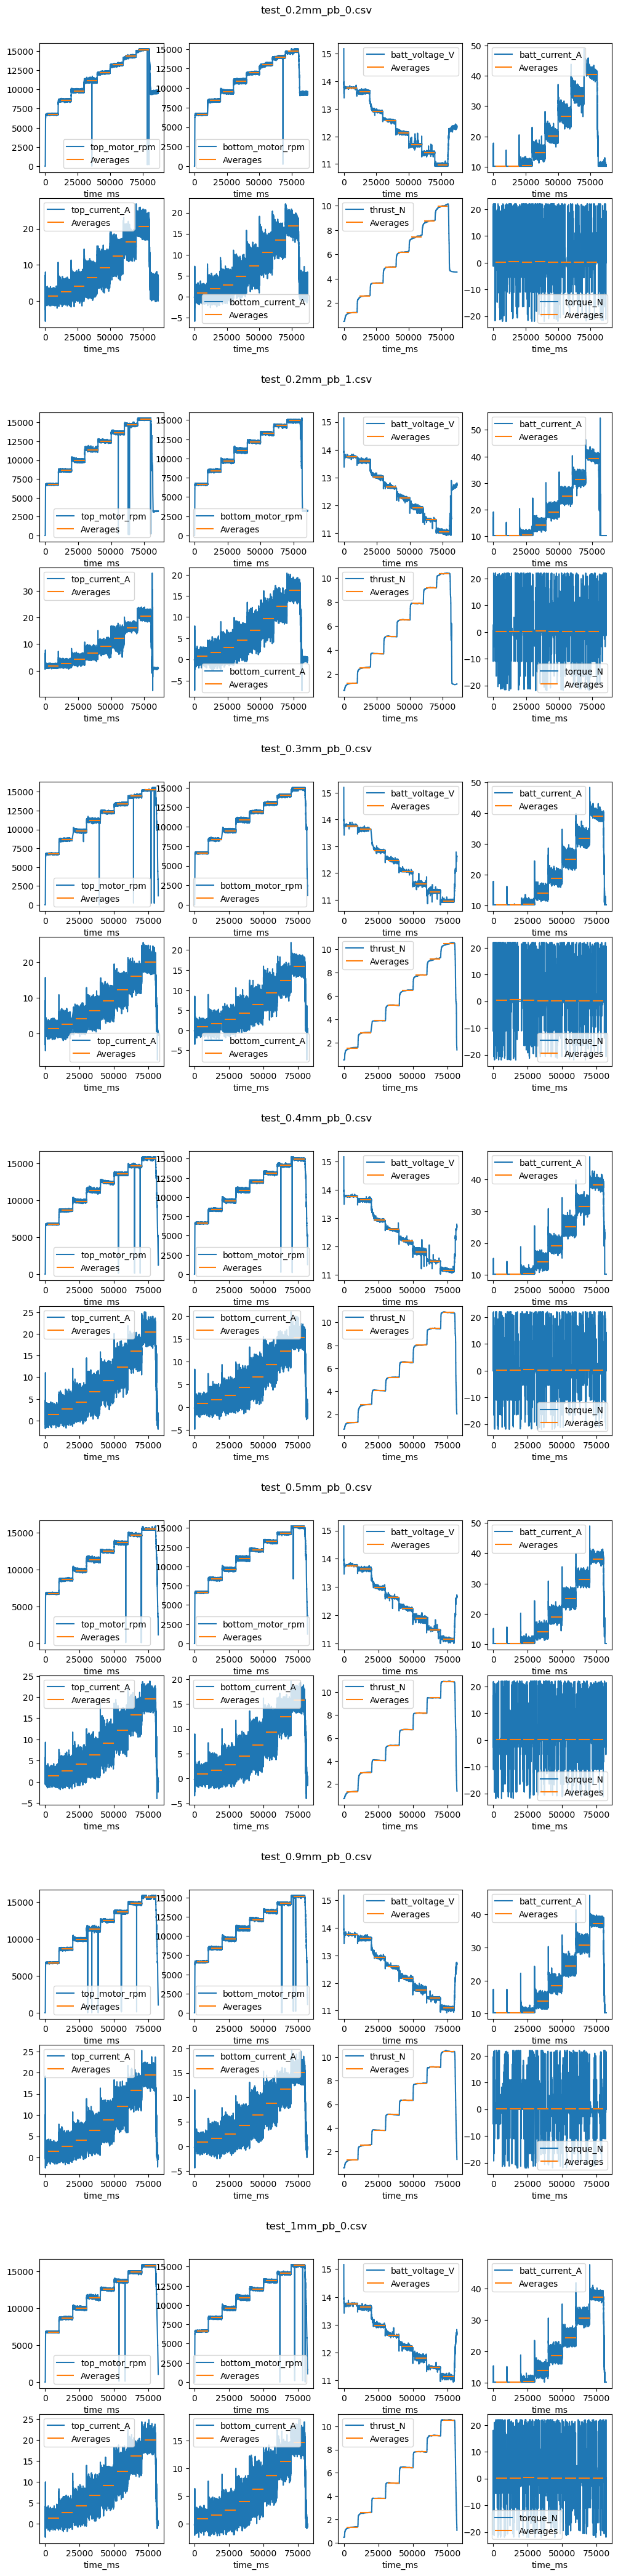

In [32]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [28]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [29]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

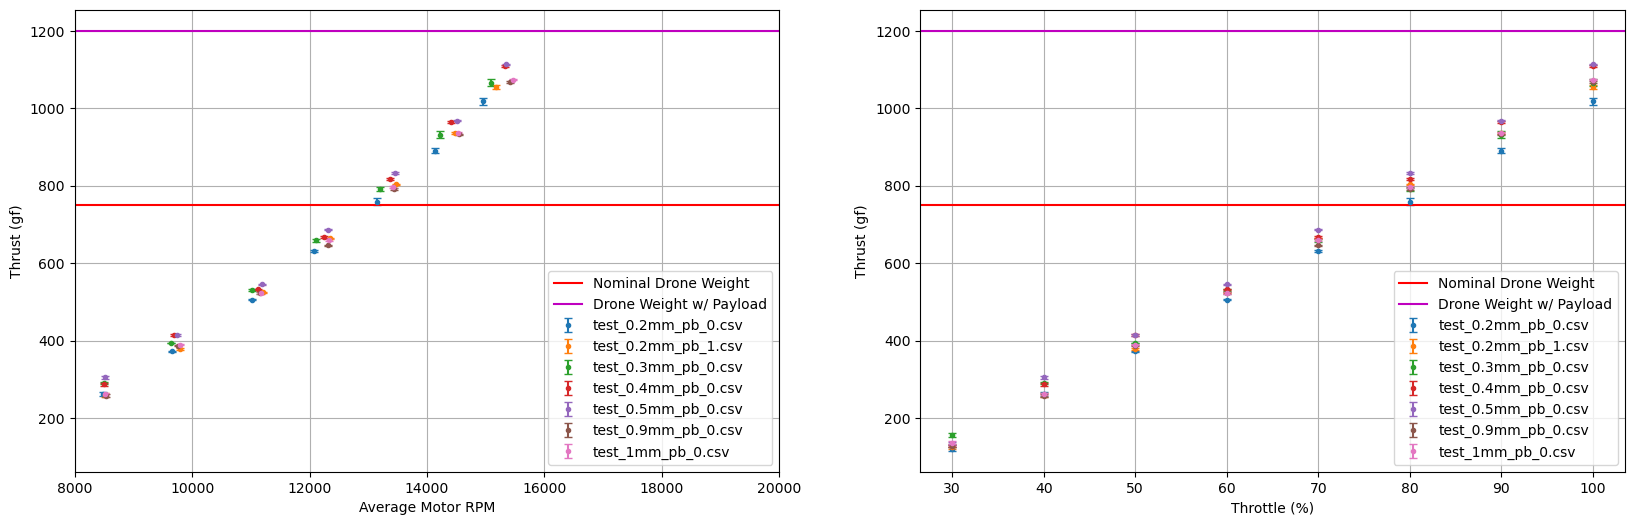

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].set_xlim(8000, 20000)
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

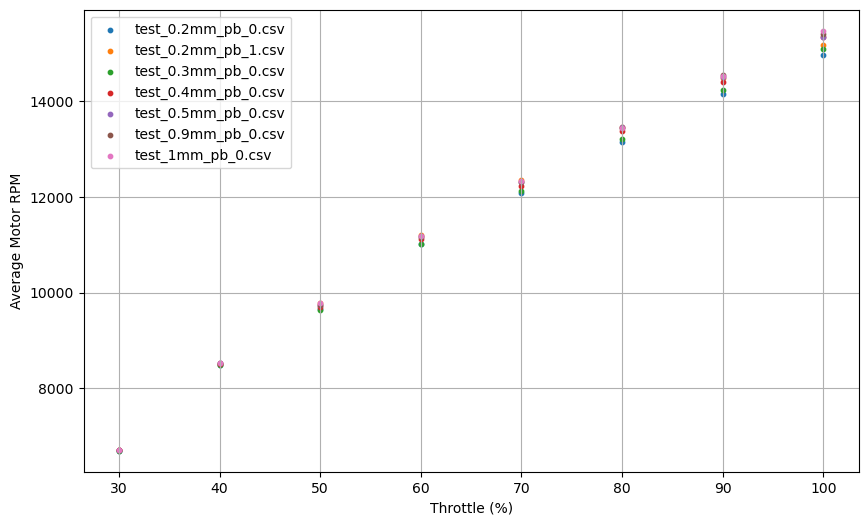

In [33]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

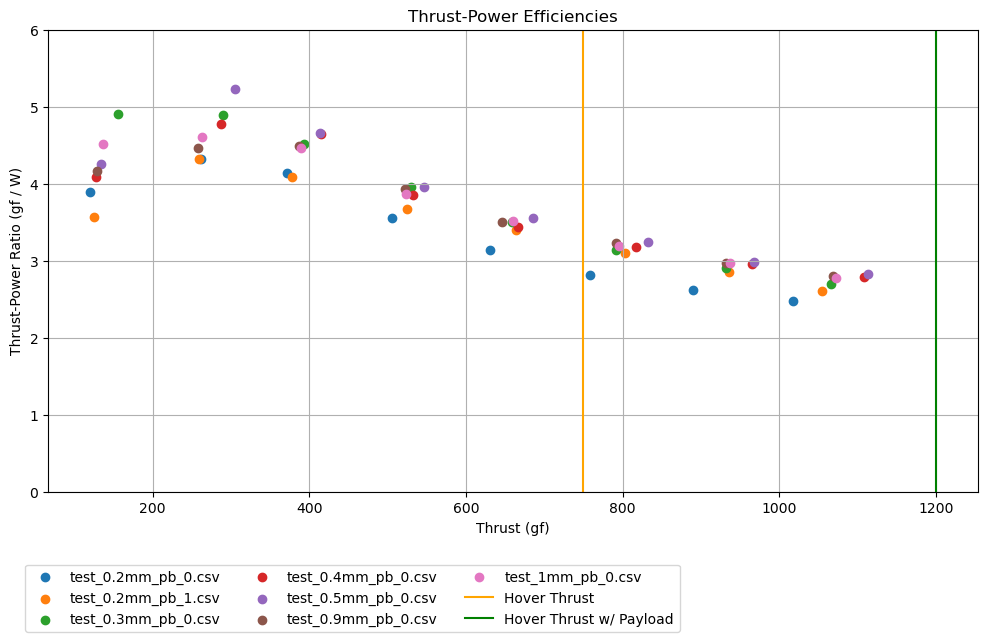

In [34]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

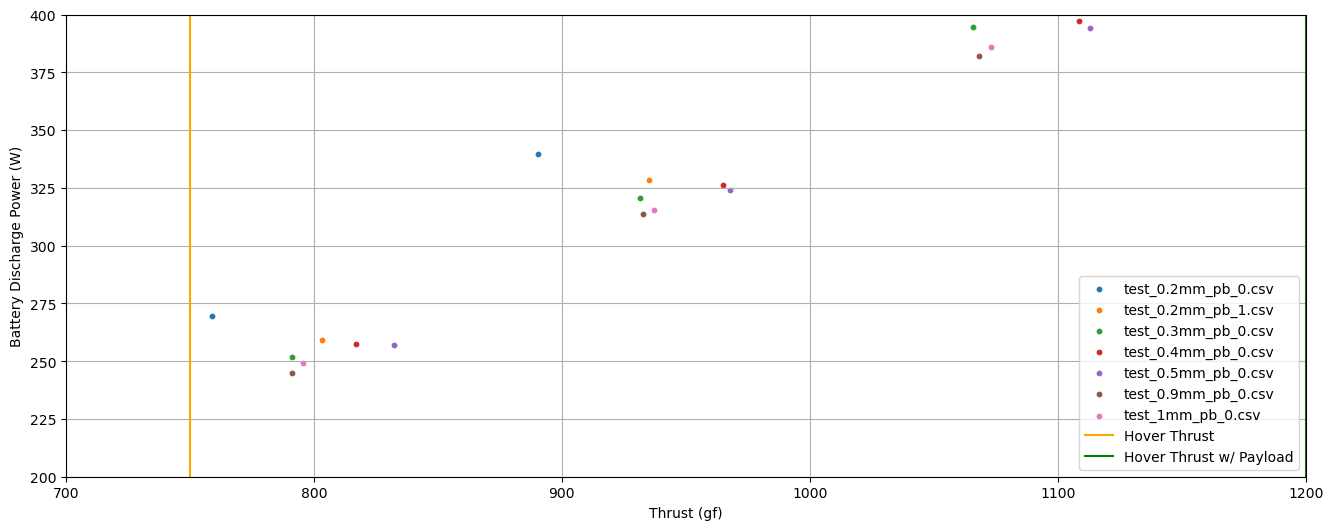

In [35]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=10)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1200)
plt.ylim(200, 400)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

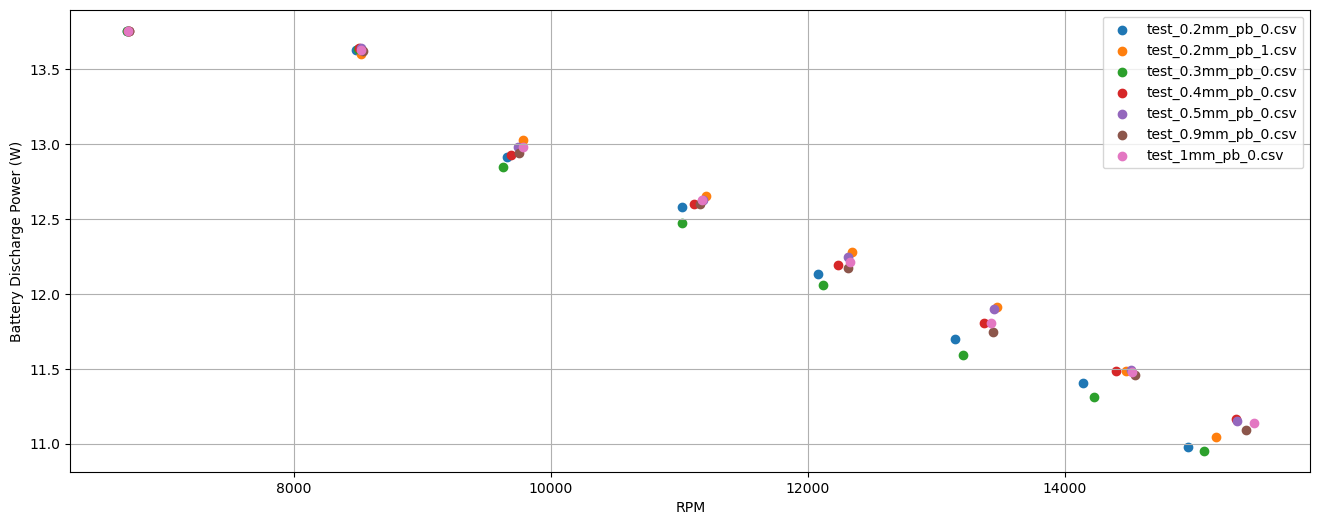

In [36]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="rpm_avg", y="batt_voltage_mean", label=n, data=grp)
plt.xlabel("RPM")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.legend()
plt.show()